# 1.Introduction #

Data from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Number of Instances: 122330.
Number of attributes: 18 (10 numerical and 8 categorical). The 'Revenue' attribute can be used as the class label. 

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"
Represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
(URL information of the pages visited by the user and updated in real time when a user takes an action).

"Bounce Rate", "Exit Rate" and "Page Value"
Represents the metrics measured by "Google Analytics" for each page in the e-commerce site.

The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page, the percentage that were the last in the session. 
The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 
The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
For example, for Valentin’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type (returning visitor, new visitor or other), month of the year (excluding January and April), a Boolean value indicating whether the date of the visit is weekend and a Boolean Revenue value.

# 2.Data Initialization & Cleaning #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import random

shop = pd.read_csv('./data/online_shoppers_intention.csv')
type(shop)

pandas.core.frame.DataFrame

In [2]:
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
shop.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [4]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

No non-null data present.

In [5]:
shop.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
shop.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

No data present for the months January and April.

In [7]:
shop.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

# 3.Exploratory Data Analysis #

## 3.1.Mean, Median, Standard Deviation ##

In [8]:
shop.ProductRelated_Duration.mean()

1194.7462199688268

Typical time a user spends on a product related page.

In [9]:
shop.ProductRelated_Duration.median()

598.9369047499999

Median being much lower than the mean.

In [10]:
sp.stats.trim_mean(shop.ProductRelated_Duration, .1)

820.0794383306499

Large outliers are impacting the mean. (proportion to cut of 0.1, cuts tails of each ends leaving 80% of data)

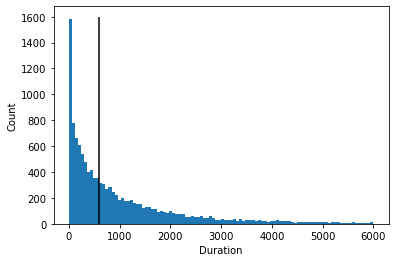

In [11]:
plt.hist(shop.ProductRelated_Duration, range=[0,6000], bins=100)
plt.vlines(x = shop.ProductRelated_Duration.median(), ymin = 0, ymax = 1600, colors='k', label='median')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

In [12]:
print('Min Product Related Duration:' , np.min(shop.ProductRelated_Duration), '  Max Product Related Duration:' ,np.max(shop.ProductRelated_Duration))

Min Product Related Duration: 0.0   Max Product Related Duration: 63973.52223


In [13]:
print("Standard deviation: " + str(np.std(shop.ProductRelated_Duration)))

Standard deviation: 1913.5916841375945


In [14]:
shop.groupby('Revenue').mean()

/tmp/ipykernel_28352/561033307.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  shop.groupby('Revenue').mean()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Revenue,,,,,,,,,,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392,0.227308
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488,0.261530


All the means for Revenue True and False.

## 3.2.Distribution of Customers

In [15]:
shop.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

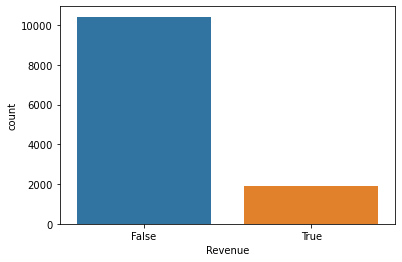

In [16]:
sns.countplot(x='Revenue', data=shop)
plt.show()

In [17]:
revenue_sum_true = np.sum(shop.Revenue == True)
revenue_sum_false = np.sum(shop.Revenue == False)
print(revenue_sum_true/revenue_sum_false * 100)

18.307426597582037


Purchase rate of customers in %.

In [18]:
shop.Weekend.value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

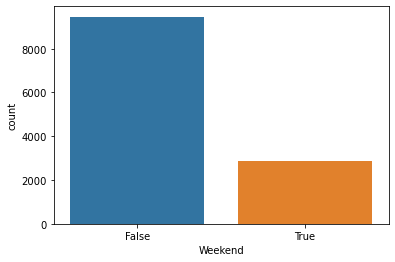

In [19]:
sns.countplot(x='Weekend', data=shop)
plt.show()

In [20]:
shop.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

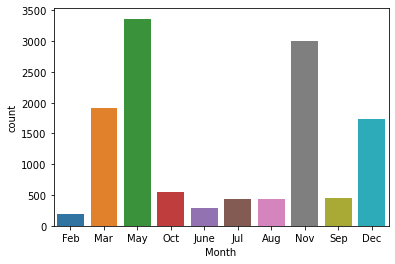

In [21]:
sns.countplot(x='Month', data=shop)
plt.show()

# 4.Association

## 4.1.Weekend and Revenue with chi2

In [22]:
pd.crosstab(shop.Weekend, shop.Revenue)

Revenue,False,True
Weekend,,
False,8053,1409
True,2369,499


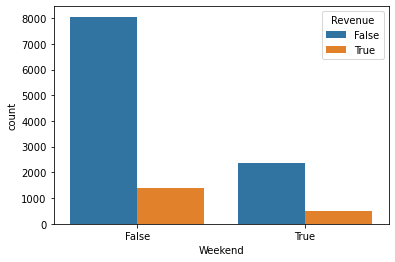

In [23]:
sns.countplot(x='Weekend', hue='Revenue' ,data=shop)
plt.show()

In [24]:
sp.stats.chi2_contingency(pd.crosstab(shop.Weekend, shop.Revenue))

(10.390978319534856,
 0.0012663251061221968,
 1,
 array([[7997.80729927, 1464.19270073],
        [2424.19270073,  443.80729927]]))

In [25]:
pd.crosstab(shop.Weekend, shop.Revenue)

Revenue,False,True
Weekend,,
False,8053,1409
True,2369,499


No association between Weekend and Revenue since the values of the chi2 contingency table and the observed values are close.

## 4.2.Revenue Hypothesis

In [26]:
shop.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

P value is probability of observing a range of values which is defined by the alternative hypothesis.

Null Hypothesis: Purchase Rate is 18%

Alternative Hypothesis: Purchase Rate is less than 18%

In [27]:
p_list = []
type_1_error = 0

for i in range(1000):
    simulated_purchases = np.random.choice([True, False], size=12330, p=(0.18, 0.82))
    amount_purchases = np.sum(simulated_purchases)
    p_value_scipy = sp.stats.binom_test(amount_purchases, 12330, .18, alternative='less')#Binominal test
    p_list.append(p_value_scipy)
    if p_value_scipy < 0.05:
        type_1_error += 1
print(type_1_error/12330 *100)

0.4622871046228711


% of times there is a type 1 error.

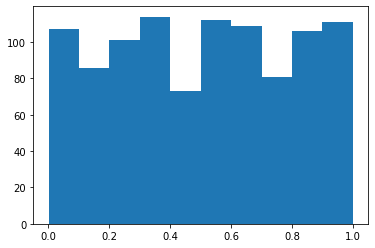

In [28]:
plt.hist(p_list)
plt.show()

Uniform distribution, rejecting the Alternative Hypothesis.

## 4.3.Relevant mean differences

Two sample t-test

Null Hypothesis: There is no difference in the mean for ProductRelated_Duration for buy and don't buy. 
(True mean of Product Duration who buy - true mean of Product Duration who don't buy = 0)

Alternative Hypothesis: There is a difference in the mean.

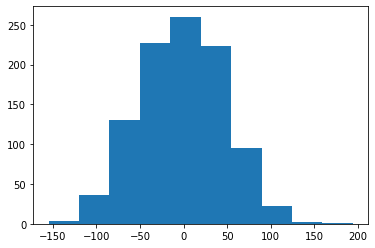

In [29]:
null_sim_mean_diff =  []
for i in range(1000):
    random_order_revenue = np.random.choice(shop.Revenue, size=len(shop), replace=False) #Randomizing order of Revenue
    sim_ProductRelated_Duration_revenue = shop.ProductRelated_Duration[random_order_revenue == True]
    sim_ProductRelated_Duration_no_revenue = shop.ProductRelated_Duration[random_order_revenue == False]
    sim_mean_diff = np.mean(sim_ProductRelated_Duration_revenue) - np.mean(sim_ProductRelated_Duration_no_revenue)
    null_sim_mean_diff.append(sim_mean_diff)
plt.hist(null_sim_mean_diff)
plt.show()

Distribution of the mean difference in simulation.

In [30]:
ProductRelated_Duration_revenue = shop.ProductRelated_Duration[shop.Revenue == True]
ProductRelated_Duration_no_revenue = shop.ProductRelated_Duration[shop.Revenue == False]
observed_mean_diff = np.mean(ProductRelated_Duration_revenue) - np.mean(ProductRelated_Duration_no_revenue)
print(observed_mean_diff)

806.2218057344617


Observed mean difference.

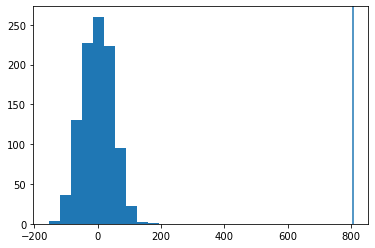

In [31]:
plt.hist(null_sim_mean_diff)
plt.axvline(x=observed_mean_diff)
plt.show()

In [32]:
np.sum(np.array(null_sim_mean_diff) > observed_mean_diff)/len(null_sim_mean_diff)

0.0

In [33]:
tstat, pval = sp.stats.ttest_ind(ProductRelated_Duration_revenue, ProductRelated_Duration_no_revenue)
print(pval)

6.115338253467455e-65


Close to 0, rejecting Alternative Hypothesis.

# 5.Correlation

Correlation matrix for an initial overview.

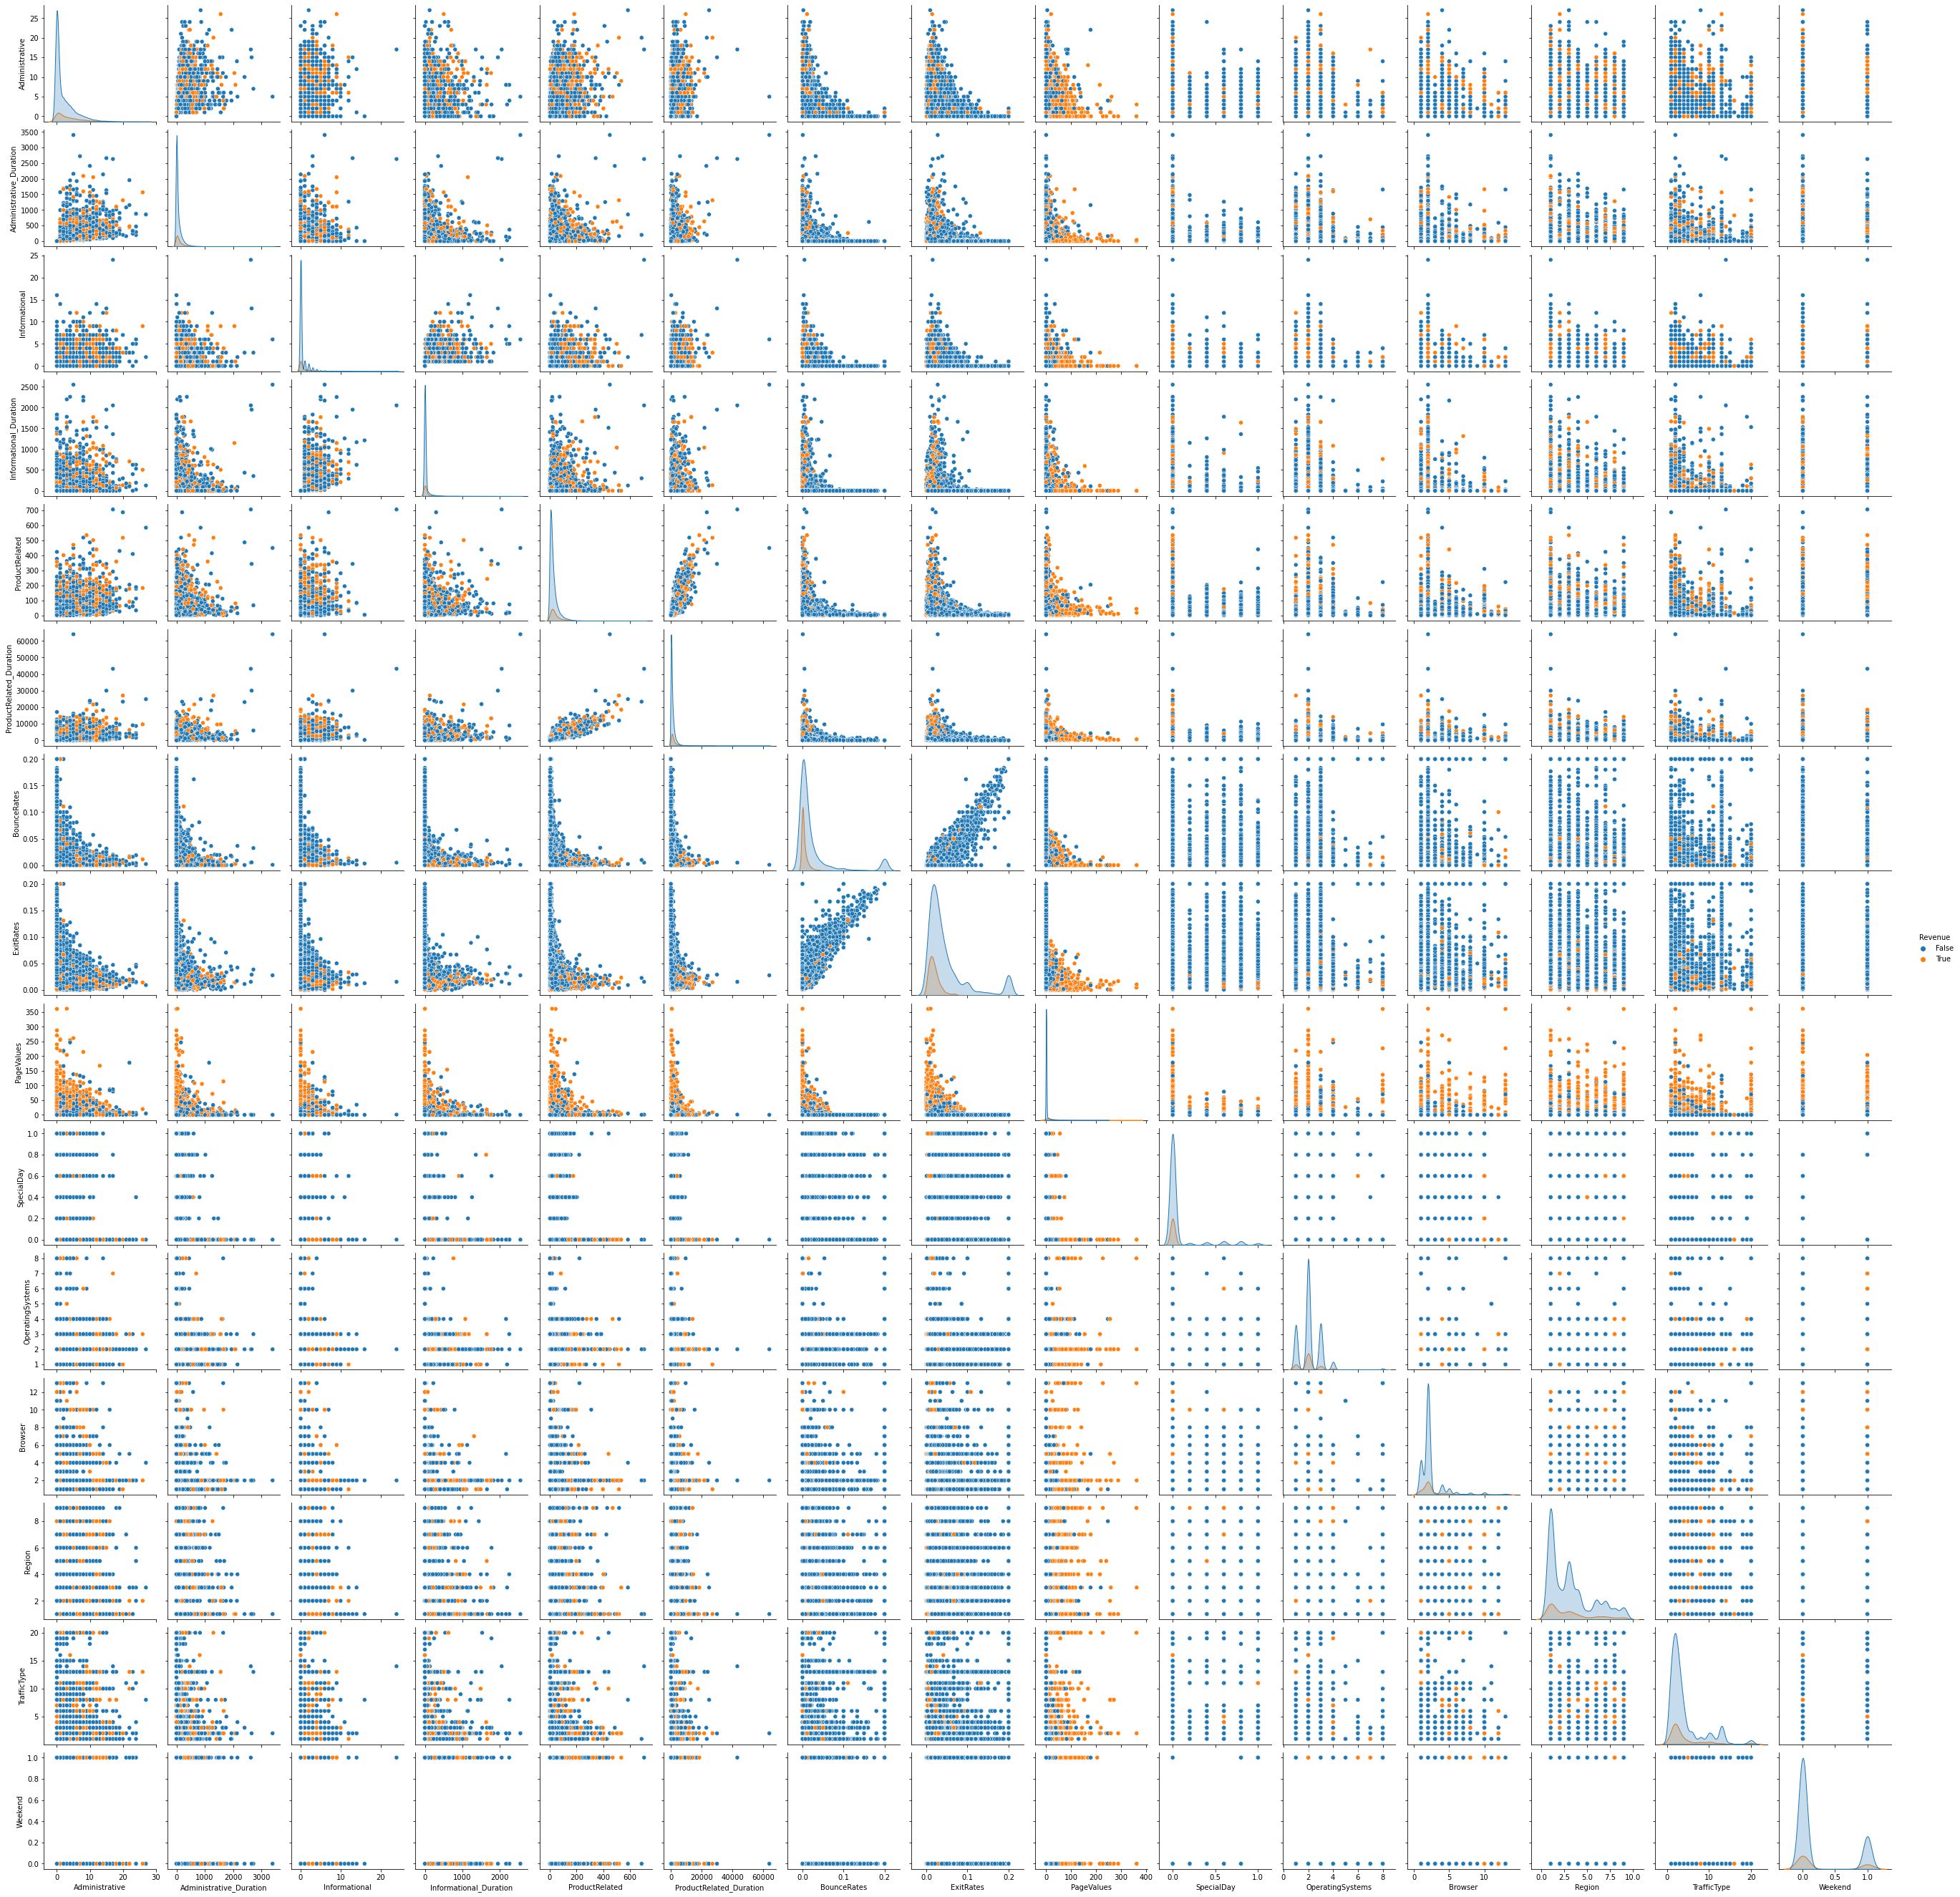

In [34]:
sns.pairplot(shop, hue='Revenue')
plt.show()

In [35]:
shop.corr()

/tmp/ipykernel_28352/3487077861.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  shop.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


1 = perfect correlation -1 = perfect negative correlation and .8 = very strong positive correlation.

/tmp/ipykernel_28352/2378138228.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(shop.corr(), center=0, cmap=colors)


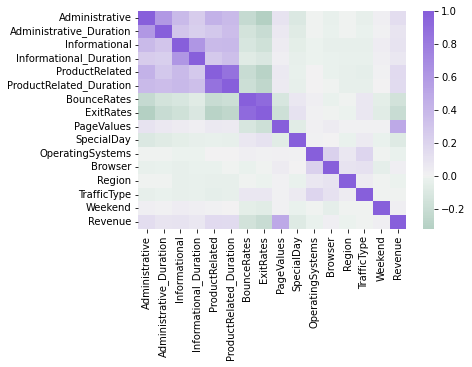

In [36]:
colors = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(shop.corr(), center=0, cmap=colors)
plt.show()

Above information shows some strong correlations, example ProductRelated and ProductRelated_Duration.

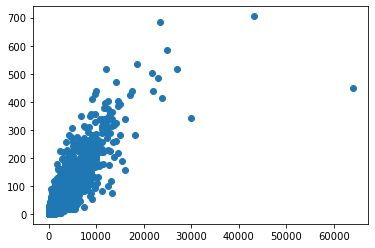

In [37]:
plt.scatter(shop.ProductRelated_Duration, shop.ProductRelated)
plt.show()

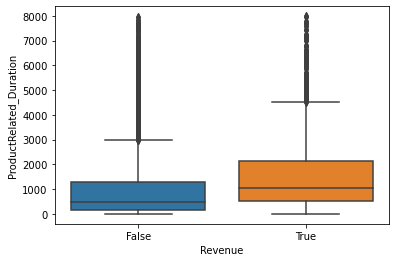

In [38]:
sns.boxplot(x='Revenue', y='ProductRelated_Duration' ,data=shop[shop.ProductRelated_Duration < 8000])
plt.show()

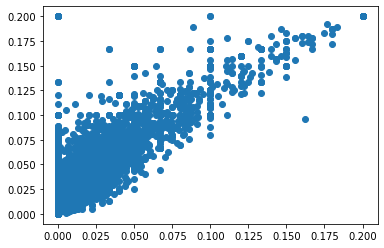

In [39]:
plt.scatter(shop.BounceRates, shop.ExitRates)
plt.show()

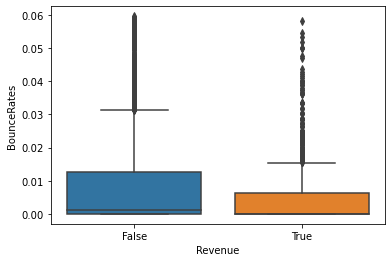

In [40]:
sns.boxplot(x='Revenue', y='BounceRates' ,data=shop[shop.BounceRates < 0.06])
plt.show()

ProductRelated ,ProductRelated_Duration, BounceRates, ExitRates and Administrative_Duration could be used in Machine Learning to create a predictive model.